# Análise exploratória de Dados (EDA) de crédito a clientes

Utilizando um recorte de dados da fonte original de dados do [Marcos Perez](https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/credito.csv) foi realizado a análise com os seguintes características descritivos:

Quantidade de linhas:
> 2.564 linhas

Colunas da base de dados:
* idade               | int    |idade do cliente |
* sexo                |string  |gênero do cliente |
* dependentes         |int     |quantidade de dependentes |
* escolaridade        |string  |nível de escolaridade |
* estado_civil        |string  |estado civil |
* salario_anual       |string  |salário por ano em dólares ($) |
* tipo_cartao         |string  |categoria de cartao |
* qtd_produtos        |int     |quantidade de produtos adquiridos |
* iteracoes_12m       |int     |quantidade de iteracoes/transacoes em 12 meses |
* meses_inativo       |int     |quantidade de meses sem atividade junto a empresa|
* limite_cartao       |double  |valor de limite do cartao |
* valor_transacoes    |double  |soma das transacoes dos últimos 12 meses |
* qtd_transacoes_12m  |int     |quantidade de transacoes em 12 meses |



# Análise individual das variáveis

In [39]:
pip install hvplot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 26.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.cluster import KMeans

## Idade

Observa-se duas concentrações por volta dos 55 (moda) e dos 35 anos, numa típica distribuição bimodal.
Também há uma distribuição alta no extremo inferior, cerca dos 26 anos.


QUERY: 
> SELECT 
MIN(idade) AS minimo_idade, 
AVG(idade) AS media_idade,
MAX(idade) AS maximo_idade
FROM credito;

   minimo_idade  media_idade  maximo_idade
0            26    45.905115            73


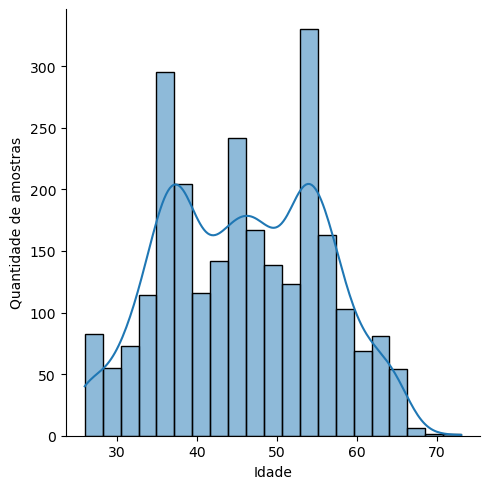

In [2]:
idade_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_idade.csv')
print(idade_df)
credito_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/credito8.csv')
grafico_dist_idade = sns.displot(credito_df.idade, kde = True);
grafico_dist_idade.set_titles('Amostras por idade');
grafico_dist_idade.set_axis_labels('Idade', 'Quantidade de amostras');


## Sexo

Vemos inicialmente que há uma maioria de cadastros do sexo masculino, contudo, ainda há uma quantidade relevante de amostras do sexo feminino;

QUERY: 
> SELECT sexo, COUNT(sexo) FROM credito;

  sexo  Amostras
0    M      1563
1    F      1001


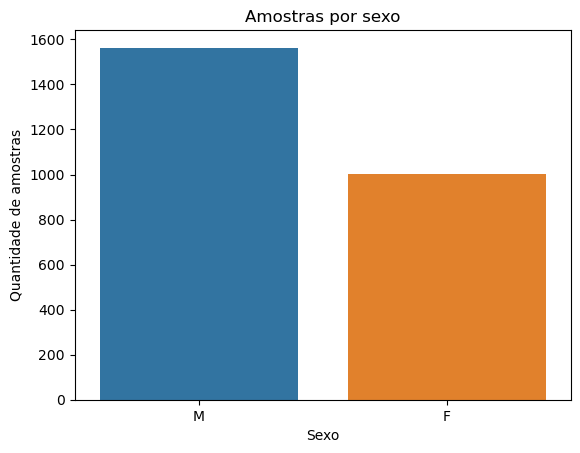

In [3]:
sexo_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_sexo.csv')
sexo_df = sexo_df.rename({'_col1': 'Amostras'}, axis = 1)
print(sexo_df)

grafico_sexo = sns.barplot(data = sexo_df, x = 'sexo', y = 'Amostras');
grafico_sexo.set_title('Amostras por sexo');
grafico_sexo.set_xlabel('Sexo');
grafico_sexo.set_ylabel('Quantidade de amostras');


## Dependentes

Temos que a quantidade de dependentes se distribui ao redor 2. Esta é uma variável que pode guardar correlação com a quantidade de transações e de 

QUERY: 
> SELECT dependentes, COUNT(dependentes) FROM credito;

   Qtde_dependentes  Amostras
0                 1       545
1                 5        66
2                 4       324
3                 3       612
4                 2       680
5                 0       337


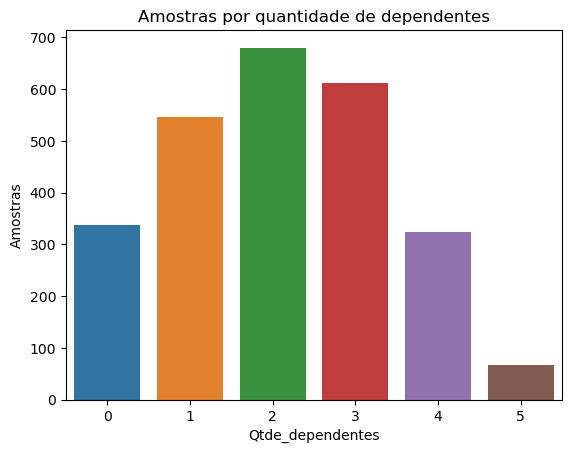

In [4]:
dependentes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_dependentes.csv')
dependentes_df = dependentes_df.rename({'_col1': 'Amostras', 'dependentes': "Qtde_dependentes" }, axis = 1)
print(dependentes_df)
grafico_dependentes = sns.barplot(data = dependentes_df, x = 'Qtde_dependentes', y = 'Amostras');
grafico_dependentes.set_title('Amostras por quantidade de dependentes');


## Nível de Escolaridade

O recorte selecionado da base original privilegiou amostras com nível de escolaridade Mestrado, atípico em relação à população.
Foram encontradas também 346 das 2564 amostras sem dados, os quais foram retirados.

QUERY: 
> SELECT escolaridade, COUNT(escolaridade) FROM credito;

    Nivel_Escolaridade  Amostras
0             mestrado       810
1  sem educacao formal       367
2            graduacao       261
3            doutorado       235
4                   na       346
5         ensino medio       545
Quantidade de amostras: 2564
*-**-**-**-**-**-**-**-**-**-**-**-*
    Nivel_Escolaridade  Amostras
0             mestrado       810
1  sem educacao formal       367
2            graduacao       261
3            doutorado       235
5         ensino medio       545
Quantidade de amostras sem "na": 2218


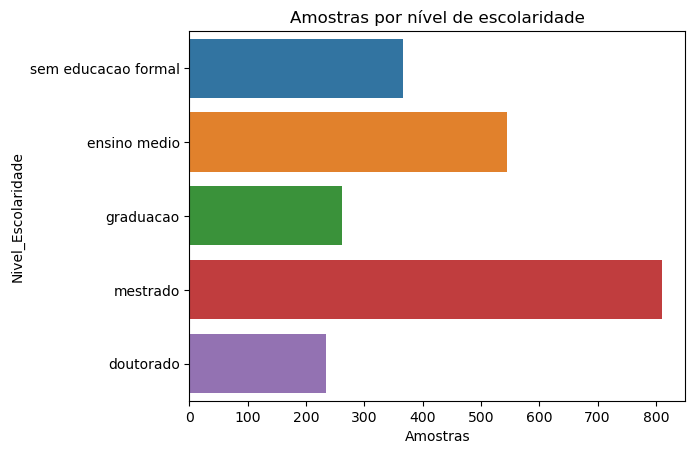

In [5]:
escolaridade_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_escolaridade.csv')
escolaridade_df = escolaridade_df.rename({'_col1': 'Amostras', 'escolaridade': 'Nivel_Escolaridade'}, axis = 1)
print(escolaridade_df)
print(f'Quantidade de amostras: {escolaridade_df.Amostras.sum()}')
print('*-*'*12)
escolaridade_df = escolaridade_df[escolaridade_df != 'na'].dropna()
print(escolaridade_df)
print(f'Quantidade de amostras sem "na": {escolaridade_df.Amostras.sum()}')

grafico_escolaridade = sns.barplot(data = escolaridade_df, 
                                   y = 'Nivel_Escolaridade', 
                                   x = 'Amostras',
                                  order = ['sem educacao formal','ensino medio','graduacao',
                                          'mestrado','doutorado']);
grafico_escolaridade.set_title('Amostras por nível de escolaridade');

# ajustar o tamanho do gráfico e/ou do testo do eixo

## Estado civil

A nível de estado civil, o recorte é bastante coerente com a população.

Há presença de amostras sem informação (na).

QUERY: 
> SELECT estado_civil, COUNT(estado_civil) FROM credito;


  estado_civil  Amostras
0     solteiro       766
1           na       116
2   divorciado       161
3       casado      1521
Quantidade de amostras: 2564
*-**-**-**-**-**-**-**-**-**-**-**-*
  estado_civil  Amostras
0     solteiro       766
2   divorciado       161
3       casado      1521
Quantidade de amostras sem "na": 2448


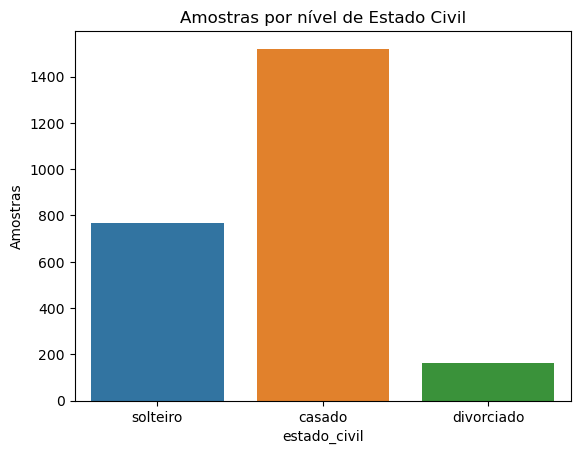

In [6]:
estadocivil_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_estado_civil.csv')

estadocivil_df = estadocivil_df.rename({'_col1': 'Amostras'}, axis = 1)
print(estadocivil_df)
print(f'Quantidade de amostras: {estadocivil_df.Amostras.sum()}')
print('*-*'*12)
estadocivil_df = estadocivil_df[estadocivil_df != 'na'].dropna()
print(estadocivil_df)
print(f'Quantidade de amostras sem "na": {estadocivil_df.Amostras.sum()}')

grafico_estadocivil = sns.barplot(data = estadocivil_df, 
                                   x = 'estado_civil', 
                                   y = 'Amostras',
                                  order = ['solteiro','casado','divorciado']);
grafico_estadocivil.set_title('Amostras por nível de Estado Civil');


## Salário anual em dólares

A faixa salarial foi ordenada por categoria salarial e reflete aproximadamente a realidade americana, fora a grande concentração de clientes que recebem até os $40 k anuais:

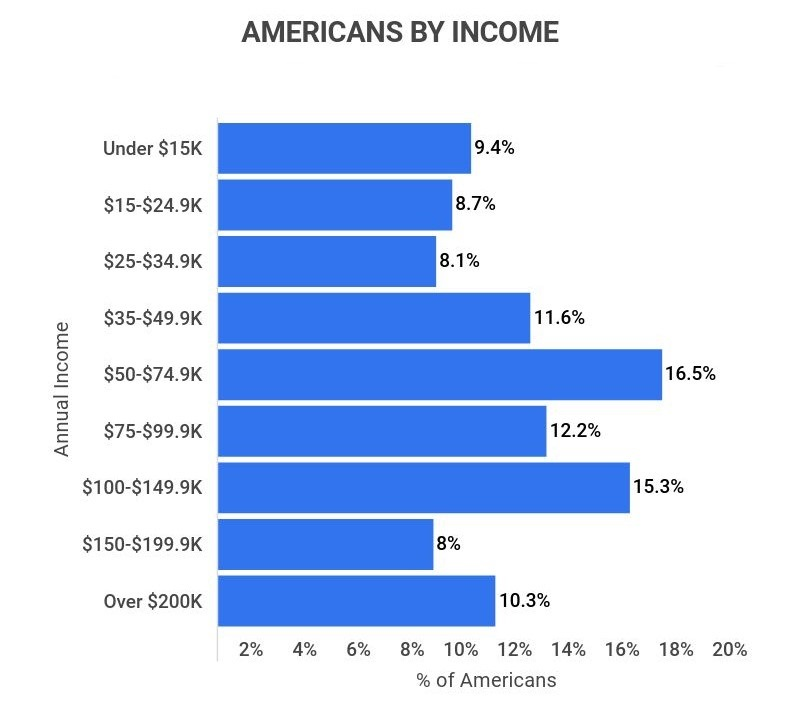

Fonte: https://www.zippia.com/advice/average-american-income/

Talvez por efeito do recorte selecionado, onde muitos cliente têm mestrado, tenha influenciado na faixa salarial acima de 80.000,00 dólares.

QUERY:
> SELECT salario_anual, COUNT(salario_anual) FROM credito;

    salario_anual  Amostras
0              na       235
1     $40K - $60K       467
2         $120K +       222
3    $80K - $120K       488
4     $60K - $80K       451
5  menos que $40K       701
Quantidade de amostras: 2564
*-**-**-**-**-**-**-**-**-**-**-**-*
    salario_anual  Amostras
1     $40K - $60K       467
2         $120K +       222
3    $80K - $120K       488
4     $60K - $80K       451
5  menos que $40K       701
Quantidade de amostras sem "na": 2329


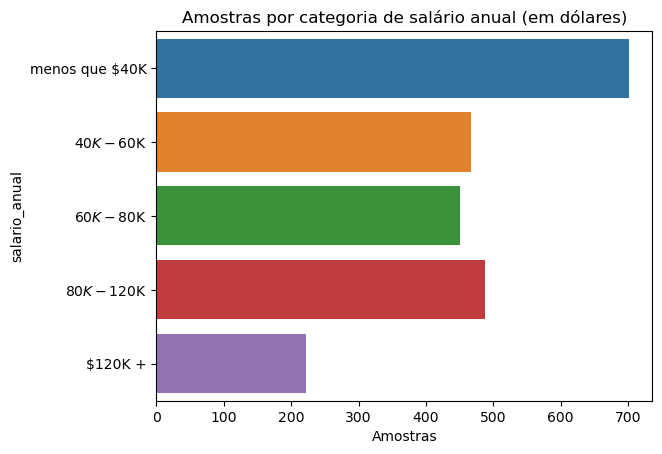

In [7]:
salario_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_salario_anual.csv')

salario_df = salario_df.rename({'_col1': 'Amostras'}, axis = 1)
print(salario_df)
print(f'Quantidade de amostras: {salario_df.Amostras.sum()}')
print('*-*'*12)
salario_df = salario_df[salario_df != 'na'].dropna()
print(salario_df)
print(f'Quantidade de amostras sem "na": {salario_df.Amostras.sum()}')

grafico_salario = sns.barplot(data = salario_df, 
                                   y = 'salario_anual', 
                                   x = 'Amostras',
                                  order = ['menos que $40K',
                                           '$40K - $60K','$60K - $80K',
                                           '$80K - $120K','$120K +']);
grafico_salario.set_title('Amostras por categoria de salário anual (em dólares)');


## Categoria de cartão

Entendeu-se que a sequência ordenada do mais básico ao mais sofisticado dos níveis de produto seria: blue (mais abundante), silver, gold e platinum (mais raro).

QUERY:
> SELECT tipo_cartao, COUNT(tipo_cartao) FROM credito;

  tipo_cartao  Amostras
0    platinum         2
1      silver        93
2        blue      2453
3        gold        16
Quantidade de amostras: 2564


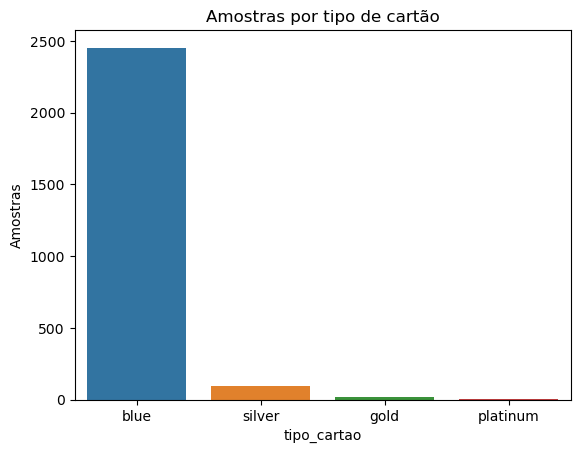

In [8]:
cartao_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_tipo_cartao.csv')

cartao_df = cartao_df.rename({'_col1': 'Amostras'}, axis = 1)
print(cartao_df)
print(f'Quantidade de amostras: {cartao_df.Amostras.sum()}')

grafico_salario = sns.barplot(data = cartao_df, 
                                   x = 'tipo_cartao', 
                                   y = 'Amostras',
                                  order = ['blue','silver','gold','platinum']);
grafico_salario.set_title('Amostras por tipo de cartão');


## Quantidade de produtos adquiridos
A maioria dos clientes adquiriram entre 3 e 6 produtos do banco, enquanto poucos adquiriram 1 a 2 produtos, como se observa abaixo.

QUERY:
> SELECT qtd_produtos, COUNT(qtd_produtos) FROM credito;

   qtd_produtos  Amostras
0             6       624
1             2       101
2             3       631
3             1        32
4             5       596
5             4       580
Quantidade de amostras: 2564


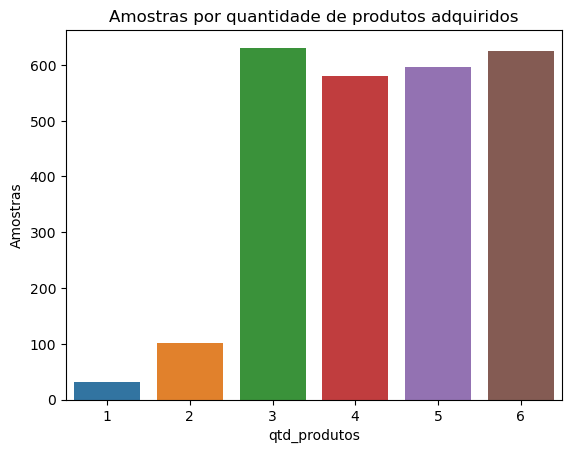

In [9]:
qtdeprodutos_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_qtd_produtos.csv')
qtdeprodutos_df = qtdeprodutos_df.rename({'_col1': 'Amostras'}, axis = 1)
print(qtdeprodutos_df)
print(f'Quantidade de amostras: {qtdeprodutos_df.Amostras.sum()}')

grafico_produtos = sns.barplot(data = qtdeprodutos_df, 
                                   x = 'qtd_produtos', 
                                   y = 'Amostras',
                                  order = [1, 2, 3, 4 ,5 ,6]);
grafico_produtos.set_title('Amostras por quantidade de produtos adquiridos');


## Quantidade de iterações/transações em 12 meses

Observam-se 2 a 4 iterações anuais da maioria dos clientes.

QUERY:
> SELECT iteracoes_12m, COUNT(iteracoes_12m) FROM credito;

   iteracoes_12m  Amostras
0              4       482
1              5        51
2              3       837
3              1       163
4              2       866
5              0       165
Quantidade de amostras: 2564


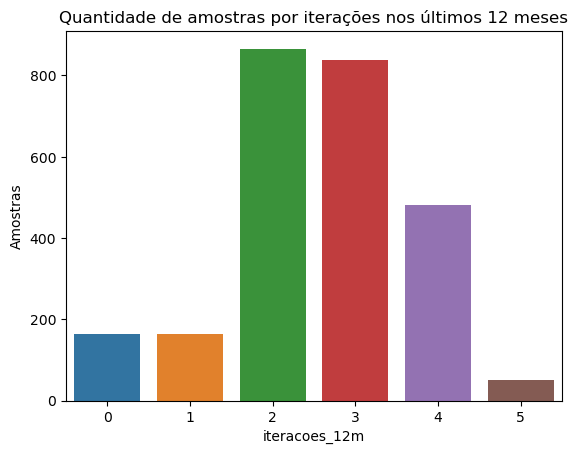

In [10]:
iteracoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_iteracoes_12m.csv')
iteracoes_df = iteracoes_df.rename({'_col1': 'Amostras'}, axis = 1)
print(iteracoes_df)
print(f'Quantidade de amostras: {iteracoes_df.Amostras.sum()}')

grafico_iteracoes = sns.barplot(data = iteracoes_df,
                               x = 'iteracoes_12m',
                               y = 'Amostras',
                               order = [0,1,2,3,4,5]);
grafico_iteracoes.set_title('Quantidade de amostras por iterações nos últimos 12 meses');
# renomear eixo

## Quantidade de meses sem atividade junto a empresa

Observa-se que é normal o cliente ficar entre 1 e 3 meses sem realizar atividades com a empresa e que praticamente nenhum cliente tem iteração frequente (0 meses).

Como a maioria dos clientes fazem 2 a 4 iterações anuais, entende-se que ficará de 6 a 3 meses de inatividade.

QUERY:
> SELECT meses_inativo, COUNT(meses_inativo) FROM credito;



   meses_inativo  Amostras
0              1       631
1              6        27
2              4        97
3              5        29
4              3       946
5              2       828
6              0         6
Quantidade de amostras: 2564


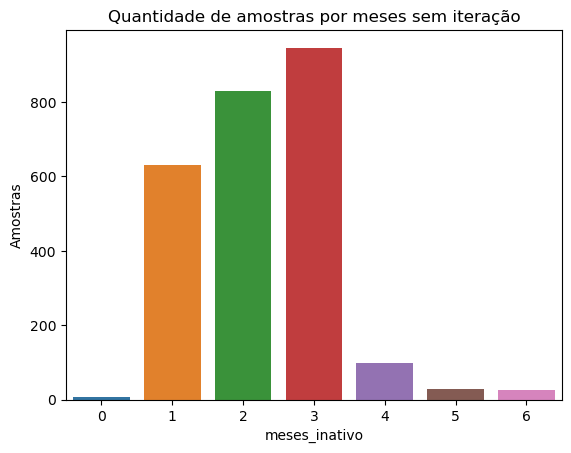

In [11]:
inatividade_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-count_meses_inativo.csv')
inatividade_df = inatividade_df.rename({'_col1': 'Amostras'}, axis = 1)

print(inatividade_df)
print(f'Quantidade de amostras: {inatividade_df.Amostras.sum()}')

grafico_inatividade = sns.barplot(data = inatividade_df,
                               x = 'meses_inativo',
                               y = 'Amostras',
                               order = [0,1,2,3,4,5,6]);
grafico_inatividade.set_title('Quantidade de amostras por meses sem iteração');
# renomear eixo

## Valor de limite do cartão 

Observa-se uma distribuição normal de redução de quantidade de amostras à medida que aumenta o limite oferecido para os cartões.

Porém, nota-se uma anomalia no limite superior do cartão ($34 a 35k), carecendo de avaliação mais detalhada.

QUERY: 
> SELECT 
MIN(limite_cartao) AS minimo_limite, 
AVG(limite_cartao) AS media_limite,
MAX(limite_cartao) AS maximo_limite
FROM credito;

   minimo_limite  media_limite  maximo_limite
0        1438.03   9072.720293       34516.99


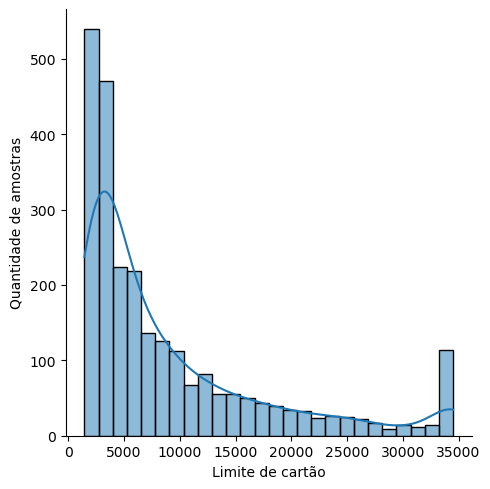

In [12]:
limite_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_limite_cartao.csv')
print(limite_df)

grafico_limite = sns.displot(credito_df.limite_cartao, kde = True);
grafico_limite.set_titles('Distribuição de amostras por limite de cartão');
grafico_limite.set_axis_labels('Limite de cartão', 'Quantidade de amostras');

## Valor das transações dos últimos 12 meses

Observa-se a concentração de valor de transações ao redor de $1,500.00.

Aparentemente a distribuição não apresenta distorções relevantes.

QUERY: 
> SELECT 
MIN(valor_transacoes) AS minimo_transacoes, 
AVG(valor_transacoes) AS media_transacoes,
MAX(valor_transacoes) AS maximo_transacoes
FROM credito;

   minimo_transacoes  media_transacoes  maximo_transacoes
0             510.16         1820.3261            4776.58


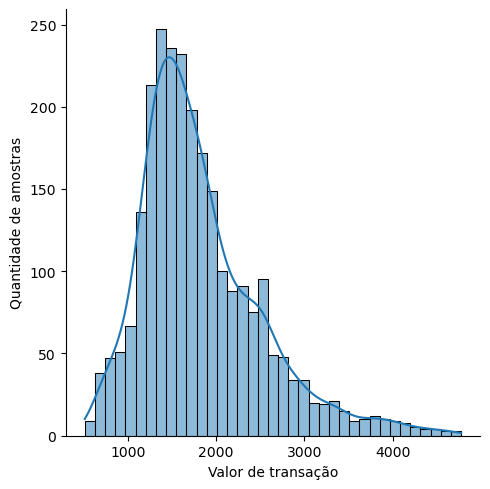

In [13]:
transacoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_valor_transacao.csv')
print(transacoes_df)

grafico_transacoes = sns.displot(credito_df.valor_transacoes, kde = True);
grafico_transacoes.set_titles('Distribuição de amostras por valor de transações');
grafico_transacoes.set_axis_labels('Valor de transação', 'Quantidade de amostras');

## Quantidade de transações em 12 meses

Observou-e a média de 41,7 operações anuais, equivalente aproximadamente 3,5 operações mensais.

QUERY: 
> SELECT 
MIN(qtd_transacoes_12m) AS minimo_qtd_transacoes, 
AVG(qtd_transacoes_12m) AS media_qtd_transacoes,
MAX(qtd_transacoes_12m) AS maximo_qtd_transacoes
FROM credito;

   minimo_qtd_transacoes  media_qtd_transacoes  maximo_qtd_transacoes
0                     10             41.704368                    103


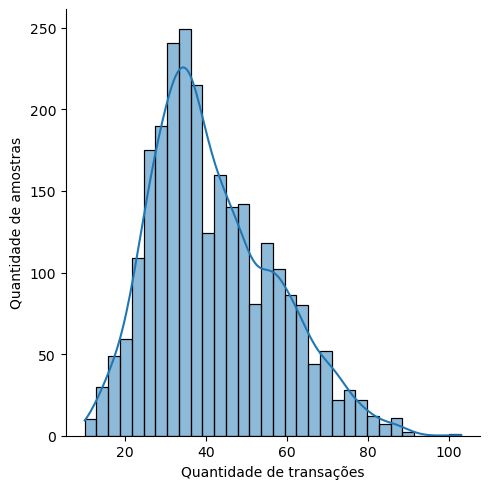

In [14]:
qtd_transacoes_df = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_qtd_transacoes_12m.csv')
print(qtd_transacoes_df)

grafico_limite = sns.displot(credito_df.qtd_transacoes_12m, kde = True);
grafico_limite.set_titles('Distribuição de amostras por quantidade de transações em 12 meses');
grafico_limite.set_axis_labels('Quantidade de transações', 'Quantidade de amostras');

# Análise de dados

Perguntas: Existe correlação entre as variáveis apontadas?

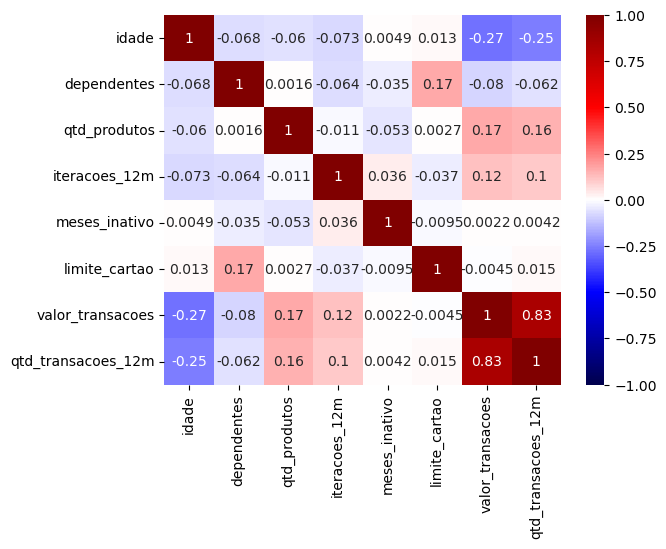

In [15]:
sns.heatmap(credito_df.corr(), vmin=-1, cmap = 'seismic', annot = True);

Conforme o mapa de calor, as variáveis revelam pouca correlação entre si, exceto a `qtd_transacoes_12m` em relação ao `valor_transacoes`.

A `idade` também parece ter uma correlação negativa com as duas variáveis citadas anteriormente.

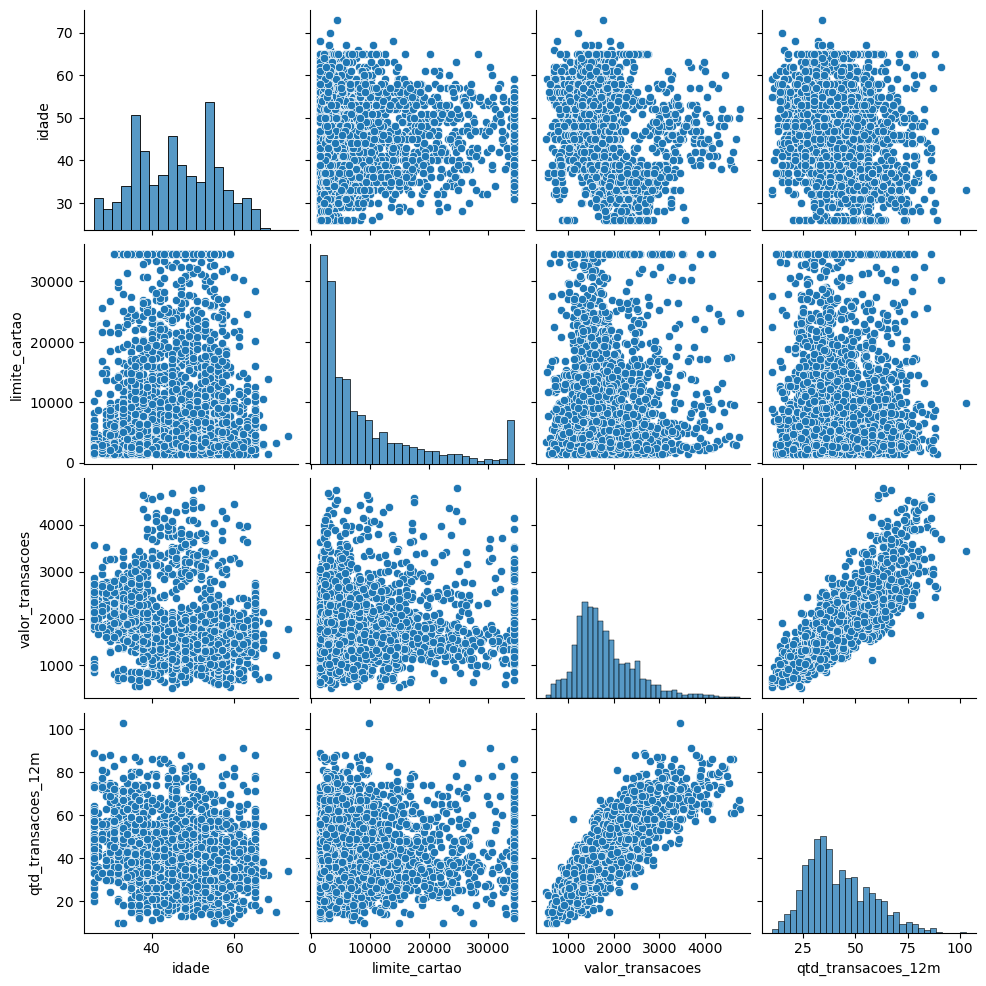

In [16]:
sns.pairplot(credito_df[['idade','limite_cartao','valor_transacoes','qtd_transacoes_12m']]);

Como esperado, há correlação direta entre a quantidade de transações e o valor da soma das transações.

## Análise 1 - Limite por sexo

Há diferença na disponibilização de limite de crédito por sexo?

QUERY:
> SELECT sexo,
MIN(limite_cartao) AS minimo_limite, 
AVG(limite_cartao) AS media_limite,
MAX(limite_cartao) AS maximo_limite
FROM credito 
GROUP BY (sexo);

  sexo  minimo_limite  media_limite  maximo_limite
0    M        1438.07      11201.36       34516.99
1    F        1438.03       5748.98       34516.99


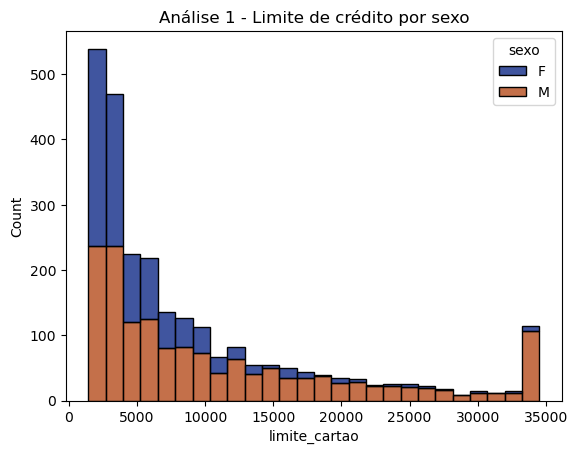

In [17]:
analise1 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_limite_cartao_por_sexo.csv')
analise1['media_limite'] = np.round(analise1['media_limite'],2)
print(analise1.sort_values(by = 'maximo_limite', ascending = False))

grafico1 = sns.histplot(x = credito_df.limite_cartao, 
             hue = credito_df.sexo, 
             palette = 'dark', 
             multiple = 'stack');
grafico1.set_title('Análise 1 - Limite de crédito por sexo');

**Resposta:**

Os valores mínimos em máximos de limite de crédito disponibilizados são praticamente os mesmos, porém, observa-se a grande diferença dos média entre os gêneros.

Conforme o gráfico Análise 1, a maior distribuição de limite de crédito para mulheres estão abaixo da média e é quase imperceptível acima da mediana.


## Análise 2 - Limite por sexo e faixa salarial anual
​
Há diferença na disponibilização de limite de crédito por sexo e faixa salarial anual?
​
QUERY:
> SELECT sexo, salario_anual,
MIN(limite_cartao) AS minimo_limite, 
AVG(limite_cartao) AS media_limite,
MAX(limite_cartao) AS maximo_limite
FROM credito 
GROUP BY (sexo, salario_anual);

In [18]:
analise2 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_limite_cartao_porSexoeSalarioAnual.csv')
analise2['media_limite'] = np.round(analise2['media_limite'],2)
print(analise2.sort_values(by = ['sexo','media_limite'], ascending = True))


  sexo   salario_anual  minimo_limite  media_limite  maximo_limite
3    F  menos que $40K        1438.08       4212.20       15987.78
0    F     $40K - $60K        1438.03       4773.45       19482.96
6    M  menos que $40K        1438.07       3452.40       12609.78
5    M     $40K - $60K        1438.18       5753.31       23981.32
1    M     $60K - $80K        1438.26       9096.03       34516.98
2    M    $80K - $120K        1438.33      14886.56       34516.99
4    M         $120K +        1438.89      17801.49       34516.97


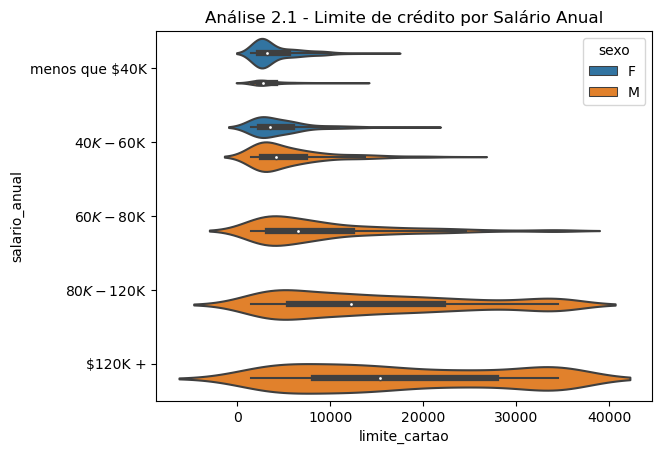

In [19]:
credito_df = credito_df[credito_df != 'na']
grafico2_1 = sns.violinplot(x = credito_df.limite_cartao, 
                          y = credito_df.salario_anual,
                            hue = credito_df.sexo,
                          scale = 'count',
                          order = ['menos que $40K',
                                           '$40K - $60K','$60K - $80K',
                                           '$80K - $120K','$120K +']
                         );
grafico2_1.set_title('Análise 2.1 - Limite de crédito por Salário Anual');

**Resposta:**

A tabela revela a informação de que as mulheres recebem no máximo 60k de salário anual, enquanto os homens receberem mais de 120k anuais.

Isso justifica o porquê de a distribuição de limite de crédito médio entre as mulheres ser menor que os dos homens.

A distribuição média de limite e o limite máximo de cartão são crescentes à medida que aumentam as faixas salariais, conforme o esperado.

O limite mínimo parece não ser padrão independente das demais categorias.

Uma curiosidade é que as mulheres com salário anual menor que 40 mil dólares têm o limite médio cerca de 22% maior que o dos homens. O contrário ocorre na faixa salarial por ano entre 40 e 60 mil dólares anuais.

## Análise 3 - Limite por sexo, faixa salarial anual e escolaridade
​
Há diferença na disponibilização de limite de crédito por sexo, faixa salarial anual e escoaridade?
​
> SELECT sexo, salario_anual, escolaridade,
MIN(limite_cartao) AS minimo_limite, 
AVG(limite_cartao) AS media_limite,
MAX(limite_cartao) AS maximo_limite
FROM credito 
WHERE salario_anual != 'na' AND escolaridade != 'na'
GROUP BY (sexo, salario_anual, escolaridade);

In [20]:
analise3 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_limite_cartao_porSexoSalarioAnualeEscolaridade.csv')
analise3['media_limite'] = np.round(analise3['media_limite'],2)
analise3.sort_values(by = 'media_limite')


,sexo,salario_anual,escolaridade,minimo_limite,media_limite,maximo_limite
32,M,menos que $40K,mestrado,1438.79,2870.25,6942.30
34,M,menos que $40K,sem educacao formal,1438.19,3451.69,8837.34
23,M,menos que $40K,ensino medio,1438.72,3813.75,12609.78
33,M,$40K - $60K,graduacao,1438.65,3987.57,12159.91
22,F,menos que $40K,doutorado,1438.21,4058.11,11696.23
28,F,menos que $40K,graduacao,1438.78,4173.05,10790.91
18,M,menos que $40K,graduacao,1438.43,4186.35,9652.24
3,F,menos que $40K,mestrado,1438.08,4203.58,15987.78
5,M,menos que $40K,doutorado,1438.07,4243.89,7173.70
2,F,menos que $40K,sem educacao formal,1438.31,4286.78,13878.33


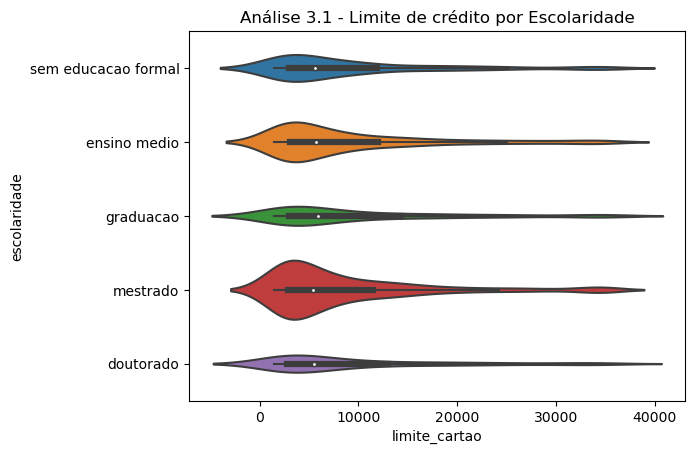

In [21]:
grafico3_1 = sns.violinplot(x = credito_df.limite_cartao, 
                          y = credito_df.escolaridade,
                          scale = 'count',
                          order = ['sem educacao formal',
                                   'ensino medio',
                                   'graduacao',
                                   'mestrado',
                                   'doutorado']
                         );
grafico3_1.set_title('Análise 3.1 - Limite de crédito por Escolaridade');

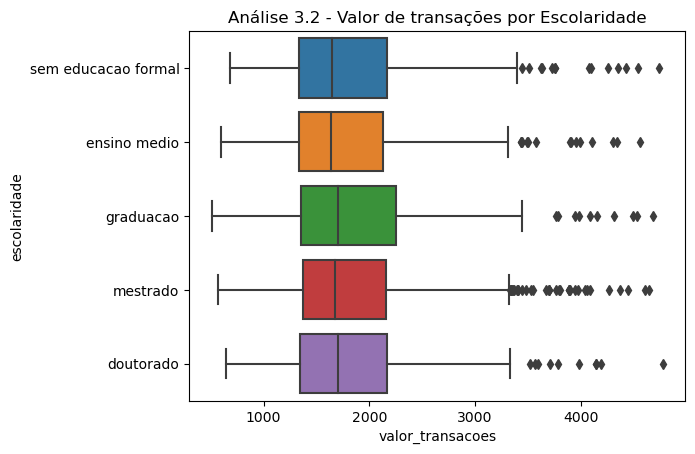

In [22]:
grafico3_2 = sns.boxplot(
                               x = credito_df.valor_transacoes, 
                               y = credito_df.escolaridade,
                               #scale = 'count',
                               order = ['sem educacao formal',
                                       'ensino medio',
                                       'graduacao',
                                       'mestrado',
                                       'doutorado']
                                         );
grafico3_2.set_title('Análise 3.2 - Valor de transações por Escolaridade');


A escolaridade não aparenta influenciar tanto no limite de crédito quanto na soma das transações.

## Análise 4 - Valor de trasação por Sexo estado civil

Há alguma relação entre o sexo e estado civil em relação ao valor das transações em 12 meses?

QUERY
> SELECT sexo, estado_civil,
MIN(valor_transacoes) AS minimo_transacao, 
AVG(valor_transacoes) AS media_transacao,
MAX(valor_transacoes) AS maximo_transacao
FROM credito
GROUP BY (sexo, estado_civil;

  sexo estado_civil  minimo_transacao  media_transacao  maximo_transacao
3    F       casado            510.16      1707.733841           4740.94
4    M       casado            563.93      1723.021129           4542.69
0    M   divorciado            781.27      1959.729565           4605.89
5    M     solteiro            530.36      1978.718821           4686.93
1    F   divorciado           1039.44      2024.668841           4370.80
2    F     solteiro            777.75      2035.268701           4776.58


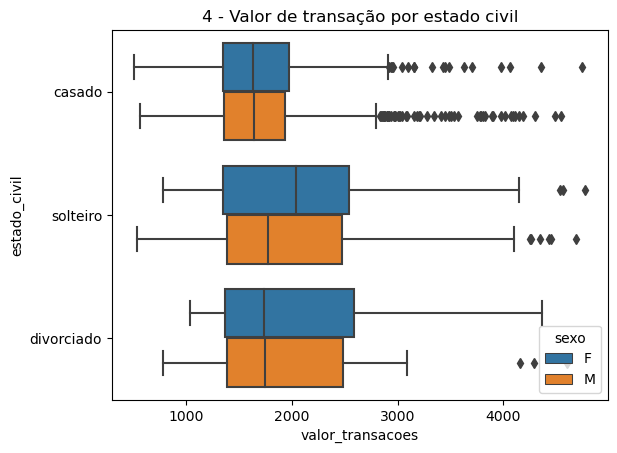

In [23]:
analise4 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_valor_transacao_porSexoeEstadoCivil.csv')
print(analise4.sort_values(by= 'media_transacao'))

grafico4 = sns.boxplot(x = credito_df.valor_transacoes,
                      y = credito_df.estado_civil,
                      hue = credito_df.sexo);
grafico4.set_title('4 - Valor de transação por estado civil');


**Resposta:**

Chama bastante atenção as mulheres solteiras e as divorciadas se destacam com os maiores valores médios de transações.

Ao mesmo tempo, as mulheres solteiras e as casadas têm os maiores valores máximo de transação.

Solteiros e divorciados, independente do gênero, possuem médias de transação superioras às dos casados.

Outro insign interessante é que, comparando-se gêneros, tanto os casados quanto os divorciados têm medianas muito próximas. Opostamente, as mulheres solteiras têm medianas destacadamente superioras aos homens solteiros.

## Análise 5 - Soma de trasações por sexo e salário anual

Há alguma relação entre o sexo e salário anual em relação ao valor das transação em 12 meses?

QUERY
> SELECT sexo, salario_anual,
MIN(valor_transacoes) AS minimo_transacao, 
AVG(valor_transacoes) AS media_transacao,
MAX(valor_transacoes) AS maximo_transacao
FROM credito
GROUP BY (sexo, salario_anual;

  sexo   salario_anual  minimo_transacao  media_transacao  maximo_transacao
3    M         $120K +            602.60      1701.465225           4686.93
4    M    $80K - $120K            563.93      1755.249877           4542.69
5    F     $40K - $60K            594.41      1781.429948           3631.00
6    M     $60K - $80K            530.36      1818.636341           4491.23
2    F  menos que $40K            510.16      1845.133149           4740.94
0    M     $40K - $60K            569.87      1878.297299           4642.78
1    M  menos que $40K            730.50      1963.671923           4449.81


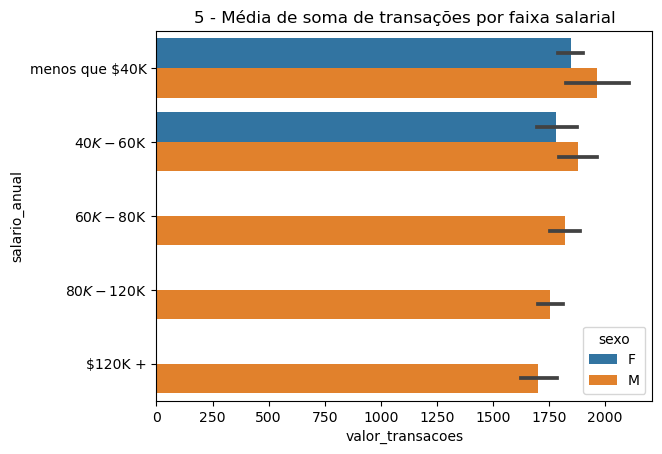

In [24]:
analise5 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_valor_transacao_porSexoeSalarioAnual.csv')
print(analise5.sort_values(by = 'media_transacao'))
grafico5 = sns.barplot(x = credito_df.valor_transacoes, y = credito_df.salario_anual,
           hue = credito_df.sexo,
            order = ['menos que $40K',
                   '$40K - $60K','$60K - $80K',
                   '$80K - $120K','$120K +']);
grafico5.set_title('5 - Média de soma de transações por faixa salarial');

**Resposta:**

As mulheres com renda menor que 40 mil dólares anuais (menor das 5 faixas salariais) são as que tem maior valor máximo de transações e o terceiro maior valor médio.

Já o valor máximo de transações guarda uma correlação leve com as faixas salariais, fora a distorção apontada anterioremente.

Existe uma contrassenso em relação à média de valor das transações e a faixa salarial, pois as duas categorias são inversamente proporcionais, de acordo com a base de dados.

## Análise 6 - Limites de cartão por dependentes e tipo de cartão

Qual é a relação da quantidade de dependentes e do tipo de cartão no consumo do produto?



### 6.1 - Limite de crédito
Query:
> SELECT dependentes, tipo_cartao,
MIN(limite_cartao) AS minimo_limite, 
AVG(limite_cartao) AS media_limite,
MAX(limite_cartao) AS maximo_limite
FROM credito 
GROUP BY (dependentes, tipo_cartao);


In [25]:
analise6 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_limite_cartao_porDependenteseCartaoartao.csv')
analise6 = analise6.dropna().sort_values(by='media_limite')
print(analise6)

#grafico7.set_title('6 - Valor de transações por dependentes')

    dependentes tipo_cartao  minimo_limite  media_limite  maximo_limite
16          0.0        blue        1438.03   5140.277377       28410.93
15          1.0        blue        1438.08   8095.365292       34516.95
13          2.0        blue        1438.10   8313.192750       34516.99
0           3.0        blue        1438.25   9120.976126       34516.92
10          5.0        blue        1438.25   9773.456949       34516.96
11          4.0        blue        1438.61  10102.466722       34516.92
8           1.0        gold       15987.78  15987.780000       15987.78
3           1.0      silver       10514.17  21246.701538       34516.99
6           0.0      silver       10110.58  21795.814545       34516.63
2           5.0      silver       15198.71  23573.756667       34516.45
17          3.0      silver       10357.97  27123.273889       34516.89
12          2.0      silver       10836.53  27524.091429       34516.96
7           4.0      silver       10091.74  27529.818824       3

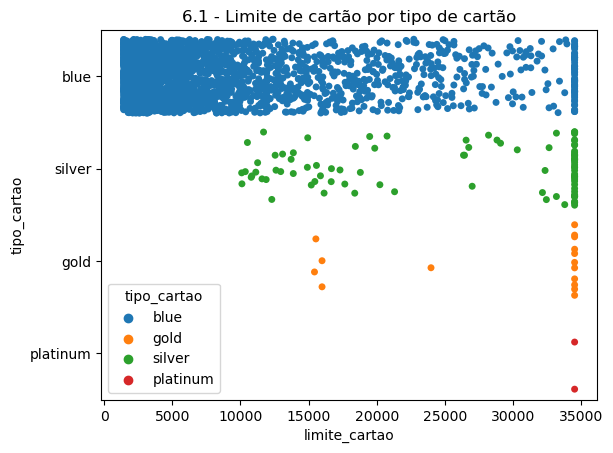

In [26]:
grafico6_1 = sns.stripplot(x = credito_df.limite_cartao,
                         y = credito_df.tipo_cartao,
                         hue = credito_df.tipo_cartao,
                         order = ['blue','silver','gold','platinum'],
                         jitter = 0.4);
grafico6_1.set_title('6.1 - Limite de cartão por tipo de cartão');


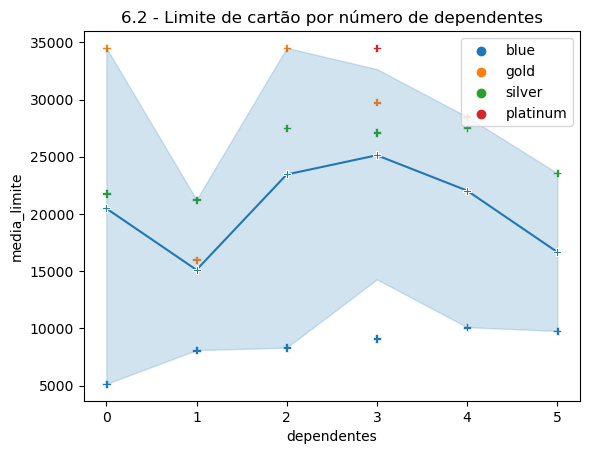

In [27]:
grafico6_2 = sns.scatterplot(x = analise6.dependentes,
                            y = analise6.media_limite,
                            hue = analise6.tipo_cartao,
                            marker = 'P');
sns.lineplot(x = analise6.dependentes,
            y = analise6.media_limite,
            marker = 'P');
grafico6_2.set_title('6.2 - Limite de cartão por número de dependentes');

Observa-se que a categoria de cartão não é limitante para o máximo de limite oferecido, apesar de que a média aumenta conforme a categoria melhora.

Já quando se observa individualmente os clientes separados por quantidade de dependentes, observa-se que aqueles que possuem 1 dependente possuem menor média, enquanto aqueles com 2 e 3 dependentes possuem acesso a maiores limites. 

### 6.2 - Valor de transações

Query:
> SELECT dependentes, tipo_cartao, MIN(valor_transacoes) AS minimo_transacoes, AVG(valor_transacoes) AS media_transacoes, MAX(valor_transacoes) AS maximo_transacoes FROM credito GROUP BY (dependentes, tipo_cartao);


In [28]:
analise6_2 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_valor_transacao_porDependenteseCartaoartao.csv')
analise6_2 = analise6_2.dropna()
analise6_2.sort_values(by = 'media_transacoes')


,dependentes,tipo_cartao,minimo_transacoes,media_transacoes,maximo_transacoes
18,3.0,platinum,1156.61,1543.225000,1929.84
0,5.0,blue,597.86,1568.013390,3210.46
4,4.0,gold,966.80,1673.252500,3899.27
2,2.0,silver,691.10,1768.427500,3725.59
1,4.0,blue,615.02,1769.385217,4686.93
7,3.0,silver,911.09,1778.723333,3530.24
9,3.0,blue,563.93,1794.750614,4776.58
13,4.0,silver,1005.00,1798.626471,3774.21
3,2.0,blue,510.16,1805.317327,4642.78
5,1.0,blue,530.36,1849.036121,4740.94


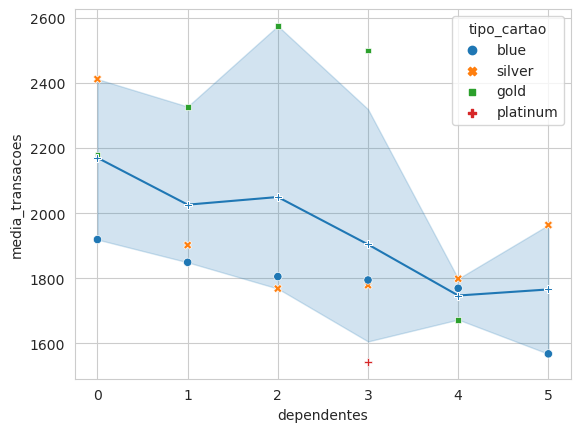

In [29]:
with sns.axes_style('whitegrid'):
    sns.lineplot(y = analise6_2.media_transacoes,
                 x = analise6_2.dependentes,
                 marker = 'P');
    sns.scatterplot(y = analise6_2.media_transacoes,
                 hue = analise6_2.tipo_cartao,
                 style = analise6_2.tipo_cartao,
                 x = analise6_2.dependentes,
                 marker = 'P');
    

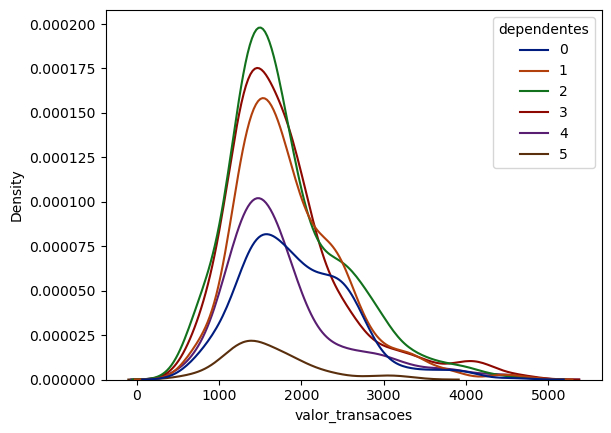

In [30]:
sns.kdeplot(x = credito_df.valor_transacoes,
            hue = credito_df.dependentes,
            palette = 'dark');

**Resposta:**
LIMITE DE CARTÃO

Na categoria `blue` (possivelmente pela boa quantidade de amostras) a quantidade de dependentes apresenta direta proporcionalidade no limite de cartão fornecido.

Na categoria `silver` existe correlação moderada também, não tão evidente quanto na `blue`.

Entretanto, o tipo de cartão tem relação direta com a média do limite do cartão oferecido.

MÉDIA DE TRANSAÇÕES

Nota-se que as médias de transações tendem a cair quanto maior a quantidade de dependentes do cliente, independente da categoria de cartão.

Comparando o consumo entre clientes, independente da quantidade de dependentes, a média de transações se concentram por volta de 1.500,00 dólares.

Os clientes com 0, 1 e 2 dependentes, apresentam aumento de consumo por volta dos 2.500,00 dólares.

Por último, clientes com 3 dependentes apresentam um aumento de consumo por volta de 4.000,00 dólares.

A categoria do cartão influencia bastante no limite oferecido, porém, a média de consumo das categorias `blue` e `silver` possuem médias muito próximas em alguns grupos de clientes com 1, 2, 3 e 4 dependentes.

## 7. Inatividade e quantidade de iterações

Existe algum padrão de consumo em relação à quantidade de iterações anuais e a de meses inativos? 

Query:
> SELECT iteracoes_12m, meses_inativo,
MIN(limite_cartao) AS minimo_limite, 
AVG(limite_cartao) AS media_limite,
MAX(limite_cartao) AS maximo_limite
FROM credito 
GROUP BY (iteracoes_12m, meses_inativo)
ORDER BY (media_limite);


In [31]:
analise7_1 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_limite_inatividade_iteracoes.csv')
analise7_1 = analise7_1.dropna()
print(analise7_1.sort_values(by='media_limite'))


    iteracoes_12m  meses_inativo  minimo_limite  media_limite  maximo_limite
0             1.0            5.0        2451.40   2451.400000        2451.40
1             0.0            0.0        1438.56   3111.900000        4785.24
2             5.0            4.0        4230.12   4230.120000        4230.12
3             1.0            4.0        1438.04   4384.272500       13535.91
4             3.0            0.0        5137.54   5137.540000        5137.54
5             0.0            5.0        3003.12   5646.303333        7717.01
6             4.0            5.0        1686.10   5883.090000       15796.11
7             1.0            6.0        2450.07   6247.246667        8851.38
8             2.0            6.0        2490.71   7063.071111       19802.04
9             5.0            1.0        2322.11   7200.998333       17162.78
10            3.0            5.0        1438.45   7514.356923       18513.33
11            4.0            1.0        1438.12   8055.031048       34516.43

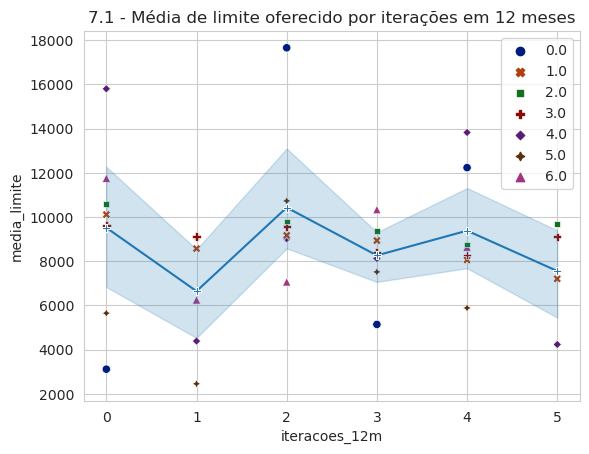

In [32]:
with sns.axes_style('whitegrid'):
    grafico7_1 = sns.scatterplot(analise7_1,
                #hue = analise7_1.meses_inativo,
                y = analise7_1.media_limite,
                x = analise7_1.iteracoes_12m,
                 hue = analise7_1.meses_inativo,
                 style = analise7_1.meses_inativo,
                marker = 'P',
                palette = 'dark');

    sns.lineplot(analise7_1,
                #hue = analise7_1.meses_inativo,
                y = analise7_1.media_limite,
                x = analise7_1.iteracoes_12m,
                marker = 'P');
    grafico7_1.set(title = '7.1 - Média de limite oferecido por iterações em 12 meses')

Query:
> SELECT iteracoes_12m, meses_inativo,
MIN(valor_transacoes) AS minimo_transacoes, 
AVG(valor_transacoes) AS media_transacoes,
MAX(valor_transacoes) AS maximo_transacoes
FROM credito 
GROUP BY (iteracoes_12m, meses_inativo)
ORDER BY (media_transacoes);

In [33]:
analise7_2 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_valor_transacao_inatividade_iteracoes.csv')
analise7_2 = analise7_2.dropna()
analise7_2.sort_values(by='media_transacoes')


,iteracoes_12m,meses_inativo,minimo_transacoes,media_transacoes,maximo_transacoes
0,4.0,0.0,936.35,1012.655000,1088.96
1,0.0,4.0,1289.53,1373.350000,1457.17
2,5.0,4.0,1480.01,1480.010000,1480.01
3,0.0,1.0,816.08,1495.989773,3974.26
4,0.0,0.0,1045.67,1498.495000,1951.32
5,3.0,5.0,647.10,1502.860000,2853.16
6,0.0,6.0,1539.95,1539.950000,1539.95
7,1.0,6.0,1257.20,1590.670000,2251.63
8,1.0,5.0,1596.34,1596.340000,1596.34
9,0.0,2.0,1025.22,1622.882692,3203.80


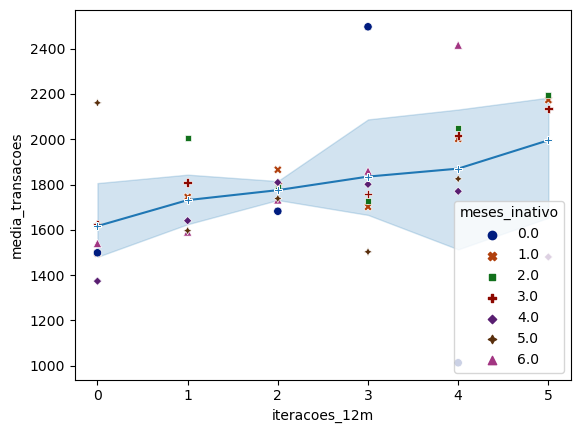

In [61]:
sns.lineplot(analise7_2,
            y = analise7_2.media_transacoes,
            x = analise7_2.iteracoes_12m,            
            marker = 'P');

sns.scatterplot(analise7_2,
            y = analise7_2.media_transacoes,
            x = analise7_2.iteracoes_12m,
            hue = analise7_2.meses_inativo,
            style = analise7_2.meses_inativo,
            palette = 'dark');


Não há diferenciação perceptível de média de transação por quantidade de iterações em 12 meses, exceto os clientes com 0 meses de inatividade, pois estes têm as maiores variações demédias de transação máximos e mínimos.

Há leve correlação entre os grupos que realizam a maior quantidade de iterações e  a média de transações, salvo se houver 0 ou 6 meses de inatividade, pois estes variam bastante nas curvas.


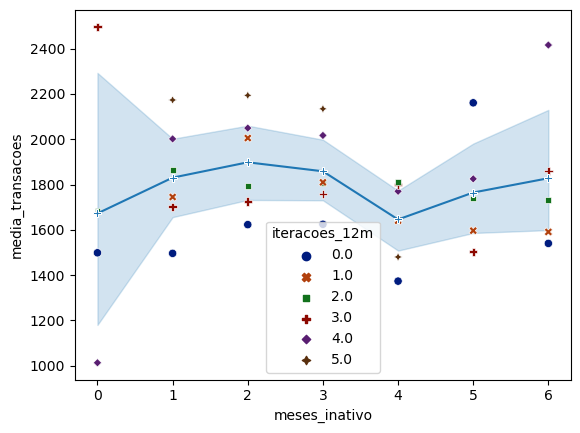

In [58]:
sns.lineplot(analise7_2,
            y = analise7_2.media_transacoes,
            x = analise7_2.meses_inativo,            
            marker = 'P');

sns.scatterplot(analise7_2,
            y = analise7_2.media_transacoes,
            x = analise7_2.meses_inativo,
            hue = analise7_2.iteracoes_12m,
            style = analise7_2.iteracoes_12m,
            palette = 'dark');

Não é perceptível influência da quantidade de meses inativos sobre a soma de transações.  

### Quantidade de produtos e quantidade de iterações

In [92]:
analise8_1 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_limite_qtdeprodutos_qtdetransacoes.csv')
#analise8_1 = analise8_1[['qtd_transacoes_12m','media_limite']].groupby('qtd_transacoes_12m').mean()
analise8_1


,qtd_produtos,qtd_transacoes_12m,minimo_limite,media_limite,maximo_limite
0,2.0,13.0,1438.23,1438.23,1438.23
1,4.0,12.0,1438.57,1438.57,1438.57
2,3.0,89.0,1438.65,1438.65,1438.65
3,1.0,22.0,1438.67,1438.67,1438.67
4,1.0,21.0,1438.72,1438.72,1438.72
...,...,...,...,...,...
343,2.0,39.0,34516.27,34516.27,34516.27
344,1.0,40.0,34516.43,34516.43,34516.43
345,1.0,12.0,34516.50,34516.50,34516.50
346,2.0,42.0,34516.86,34516.86,34516.86


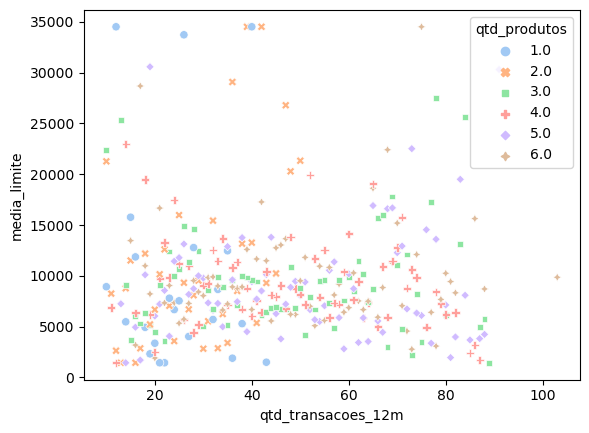

In [110]:
sns.scatterplot(data = analise8_1,
                y = 'media_limite',
                x = 'qtd_transacoes_12m',
                hue = 'qtd_produtos',
                style = 'qtd_produtos',
                palette = 'pastel');
                

In [86]:
analise8_2 = pd.read_csv('/kaggle/input/analise-credito-clientes-ebac-sql/mod35-minmaxavg_valor_transacao_qtdeprodutos_qtdetransacoes.csv')
print(analise8_2.sort_values(by = 'qtd_produtos'))
analise_graf = analise8_2[['qtd_produtos','media_transacoes']].groupby('qtd_produtos').mean()
grafico8_2_1 = analise_graf.hvplot()
analise_graf = analise8_2[['qtd_produtos','maximo_transacoes']].groupby('qtd_produtos').mean()
grafico8_2_2 = analise_graf.hvplot()
analise_graf = analise8_2[['qtd_produtos','minimo_transacoes']].groupby('qtd_produtos').mean()
grafico8_2_3 = analise_graf.hvplot()
grafico8_2_1 * grafico8_2_2 * grafico8_2_3

     qtd_produtos  qtd_transacoes_12m  minimo_transacoes  media_transacoes  \
71            1.0                40.0            1187.44       1187.440000   
37            1.0                32.0             961.13        961.130000   
36            1.0                25.0             936.35        955.115000   
33            1.0                33.0             916.04        916.040000   
138           1.0                43.0            1554.37       1554.370000   
..            ...                 ...                ...               ...   
114           6.0                26.0            1256.35       1421.301667   
118           6.0                30.0            1060.56       1438.682500   
236           6.0                52.0            1729.69       2349.533333   
173           6.0                44.0            1390.29       1772.565833   
347           NaN                 NaN                NaN               NaN   

     maximo_transacoes  
71             1187.44  
37           

:Overlay
   .Curve.I   :Curve   [qtd_produtos]   (media_transacoes)
   .Curve.II  :Curve   [qtd_produtos]   (maximo_transacoes)
   .Curve.III :Curve   [qtd_produtos]   (minimo_transacoes)

In [94]:
analise_graf = analise8_2[['qtd_transacoes_12m','media_transacoes']].groupby('qtd_transacoes_12m').mean()
grafico8_2_1 = analise_graf.hvplot()
analise_graf = analise8_2[['qtd_transacoes_12m','maximo_transacoes']].groupby('qtd_transacoes_12m').mean()
grafico8_2_2 = analise_graf.hvplot()
analise_graf = analise8_2[['qtd_transacoes_12m','minimo_transacoes']].groupby('qtd_transacoes_12m').mean()
grafico8_2_3 = analise_graf.hvplot()
grafico8_2_1 * grafico8_2_2 * grafico8_2_3

:Overlay
   .Curve.I   :Curve   [qtd_transacoes_12m]   (media_transacoes)
   .Curve.II  :Curve   [qtd_transacoes_12m]   (maximo_transacoes)
   .Curve.III :Curve   [qtd_transacoes_12m]   (minimo_transacoes)

## Análise - Cruzamento

In [130]:
df = credito_df.dropna()
df['sexo_m'] = df['sexo'].apply(lambda x: 1 if x == 'M' else 0)
df['sexo_f'] = df['sexo'].apply(lambda x: 1 if x == 'F' else 0)
df['escolaridade_ord'] = np.select([df['escolaridade'] == 'sem educacao formal', df['escolaridade'] == 'ensino medio', 
                                    df['escolaridade'] == 'graduacao', df['escolaridade'] == 'mestrado', df['escolaridade'] == 'doutorado'],
                                  [0, 1, 2, 3, 4])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo,limite_cartao,valor_transacoes,qtd_transacoes_12m,sexo_m,sexo_f,escolaridade_ord
2142,37,M,2,sem educacao formal,casado,$60K - $80K,blue,5,5,3,7959.65,1855.58,29,1,0,0
358,40,M,2,mestrado,solteiro,$80K - $120K,blue,5,0,1,2478.30,1558.60,31,1,0,3
1482,35,M,1,doutorado,casado,$80K - $120K,blue,6,4,3,13046.31,2601.73,52,1,0,4
1338,38,M,1,mestrado,solteiro,$80K - $120K,blue,6,2,3,25662.95,1484.74,36,1,0,3
631,65,M,1,sem educacao formal,casado,$40K - $60K,blue,3,2,3,2468.10,1797.86,46,1,0,0
1350,45,M,3,mestrado,casado,$60K - $80K,blue,3,2,3,9791.54,1649.31,59,1,0,3
618,52,M,2,ensino medio,casado,$120K +,blue,5,2,1,2981.69,1648.38,30,1,0,1
2125,39,M,2,sem educacao formal,casado,menos que $40K,blue,4,4,2,3702.14,2585.43,64,1,0,0
2143,33,M,1,mestrado,casado,$120K +,blue,4,3,1,4459.24,2502.37,48,1,0,3
2213,31,F,1,ensino medio,solteiro,menos que $40K,blue,5,5,1,6662.24,3264.52,83,0,1,1


In [137]:
df.sample(n=7)

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo,limite_cartao,valor_transacoes,qtd_transacoes_12m,sexo_m,sexo_f,escolaridade_ord
849,39,F,1,graduacao,casado,menos que $40K,blue,3,2,1,3214.56,2516.60,42,0,1,2
350,53,F,2,mestrado,solteiro,$40K - $60K,blue,6,0,2,5332.95,1371.53,39,0,1,3
2031,38,M,2,sem educacao formal,casado,menos que $40K,blue,6,4,2,1438.35,2412.63,58,1,0,0
946,37,F,4,graduacao,casado,$40K - $60K,blue,4,3,4,3417.74,1641.08,32,0,1,2
1396,36,M,0,mestrado,casado,$60K - $80K,blue,5,2,1,7667.93,1501.38,35,1,0,3
37,45,M,3,mestrado,solteiro,$80K - $120K,blue,2,2,2,32426.29,1109.51,28,1,0,3
855,44,M,0,sem educacao formal,casado,menos que $40K,blue,5,0,3,8837.34,3753.43,60,1,0,0


In [116]:
model = KMeans(n_clusters = 5)
model.fit(credito_df)
model.__dict__

ValueError: could not convert string to float: 'F'

In [113]:
distancia = []

for i in range(1,12):
    model = KMeans(n_clusters = i)
    model.fit(credito_df)
    distancia.append(model.inertia_)

distancia



ValueError: could not convert string to float: 'F'

# Conclusão

In [ ]:
credito.hplot()

As categorias:xxxxxxx têm maiores potenciais de utilização do cartão.